# Setting up the environment

In [1]:
#importing
import pandas as pd
import numpy as np
import os

In [2]:
#setting seed
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('ytick',labelsize=12)
mpl.rc('xtick',labelsize=12)

In [4]:
#Place to save the figures
PROJECT_ROOT_DIR = r"C:\Users\ashwi\Desktop\Ashwin\Machine_learning_Scikit_learn"
CHAPTER_ID = "end_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
#IMAGES_PATH

In [5]:
def save_fig(fig_id, tight_layout=True, fig_extension="png",resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Getting the data

In [6]:
import os
import tarfile
import urllib.request

In [7]:
HOUSING_URL = r"https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_PATH = os.path.join("datasets", "housing")

In [8]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, 'housing.tgz')
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [9]:
fetch_housing_data()

In [10]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [11]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


[]

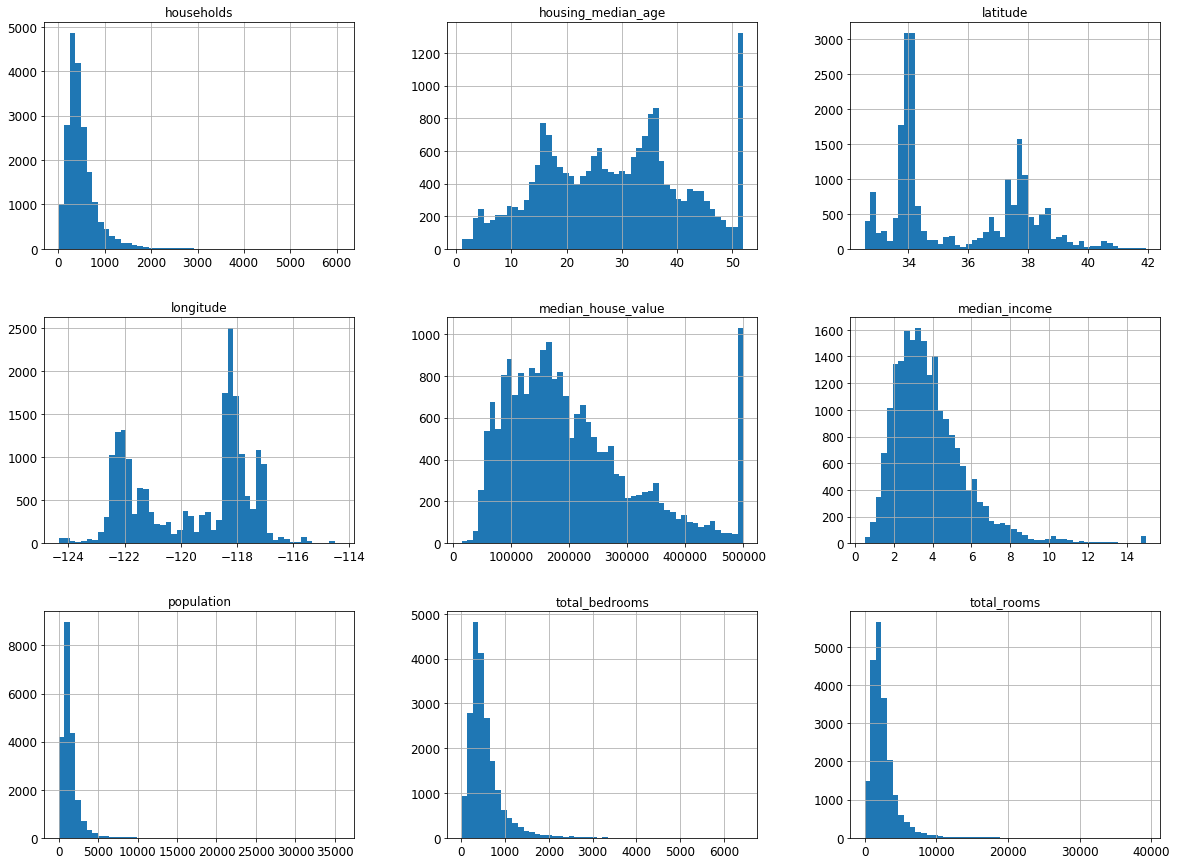

In [15]:
housing.hist(bins=50,figsize=(20,15))
plt.plot()

In [16]:
#importing for data seperation-sklearn
from sklearn.model_selection import train_test_split 

In [17]:
#splitting test and training data.
np.random.seed(42)
train_set, test_set=train_test_split(housing,test_size=0.2,random_state = 42)

In [18]:
print("Train:",len(train_set))
print("Test:",len(test_set))

Train: 16512
Test: 4128


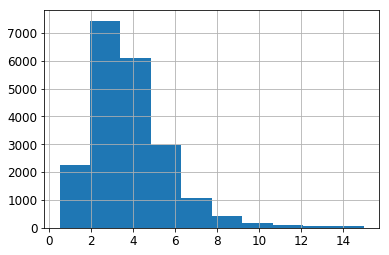

In [19]:
housing["median_income"].hist()

In [20]:
# Divide by 1.5 to limit the number of income categories
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

In [21]:
# Label those above 5 as 5
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

In [22]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

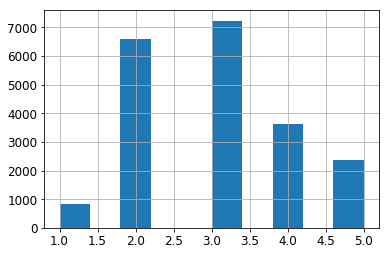

In [23]:
housing['income_cat'].hist()

In [24]:
#stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


In [25]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
#checking the proportions of each income category
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [27]:
#Dropping the income_cat column and bringing data to orginal state 
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat",axis=1,inplace=True)

In [28]:
housing = strat_train_set.copy()

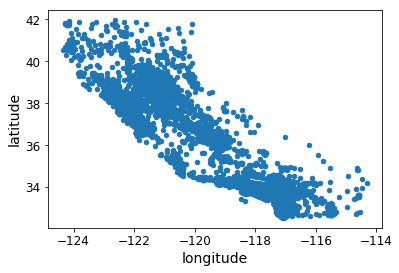

In [29]:
housing.plot(kind = "scatter",x="longitude", y="latitude")

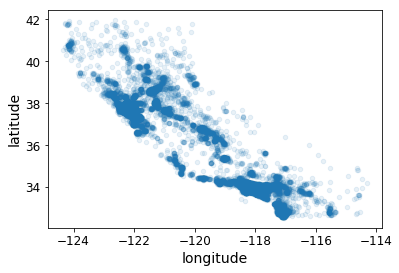

In [33]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

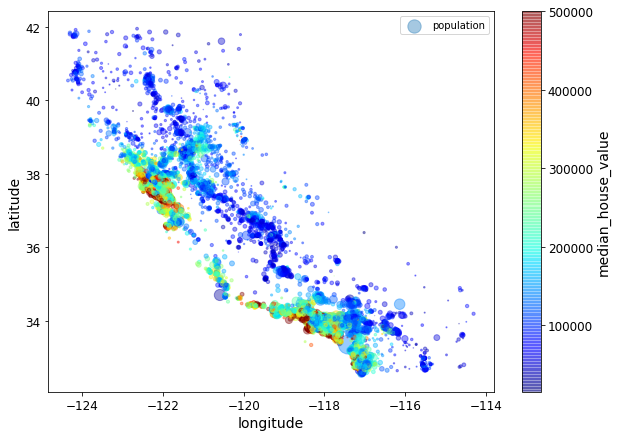

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),cmap=plt.get_cmap("jet"),c="median_house_value", colorbar=True,
    sharex=False)
plt.legend()

In [45]:
import matplotlib.image as mpimg

Saving figure california_housing_prices_plot


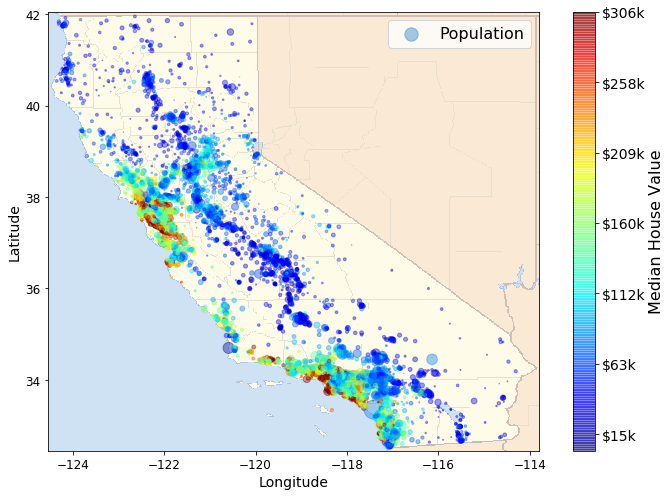

In [50]:
california_img=mpimg.imread(r'C:\Users\ashwi\Desktop\Ashwin\Machine_learning_Scikit_learn\end_end_project\california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()